# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import glob
import datetime
import gmaps
import matplotlib.pyplot as plt

In [2]:
path = "../Resources/Airbnb/Current_Listing/listings.csv"
hotel_path = "../Resources/Hotel/hotel_data.csv"
listing_df = pd.read_csv(path, low_memory = False)
hotel_df = pd.read_csv(hotel_path)
hotel_df.head()

,City,District,ADR,Month
0,Manhattan,Battery Park City,$100,Jun-18
1,Manhattan,Chelsea,$100,Jun-18
2,Manhattan,East Village,$100,Jun-18
3,Manhattan,Greenwich Village,$100,Jun-18
4,Manhattan,Hell's Kitchen,$100,Jun-18


In [3]:
cols = ["id", "name", "host_since", 
        "neighbourhood_cleansed", "city", "state", "zipcode", 'latitude', 'longitude',
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', "amenities",
        'price', 'cleaning_fee','minimum_nights', 'maximum_nights',
        'number_of_reviews','review_scores_rating',
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
        'instant_bookable','is_business_travel_ready',
        "host_is_superhost","host_response_time","host_response_rate"]
listing_rdc_df = listing_df[cols]
listing_rdc_df.head()

,id,name,host_since,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,host_is_superhost,host_response_time,host_response_rate
0,2539,Clean & quiet apt home by the park,2008-09-07,Kensington,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,...,10.0,10.0,10.0,10.0,10.0,f,f,f,within an hour,100%
1,2595,Skylit Midtown Castle,2008-09-09,Midtown,New York,NY,10018,40.75362,-73.98377,Apartment,...,9.0,10.0,10.0,10.0,9.0,f,f,f,within a few hours,83%
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,2008-11-25,Harlem,New York,NY,10027,40.80902,-73.94190,Apartment,...,NaN,NaN,NaN,NaN,NaN,f,f,f,within a day,100%
3,3831,Cozy Entire Floor of Brownstone,2008-12-07,Clinton Hill,Brooklyn,NY,11238,40.68514,-73.95976,Guest suite,...,9.0,10.0,10.0,10.0,9.0,f,f,f,within an hour,100%
4,4989,Great 1 bdrm. apartment in the PERFECT location!,2009-01-26,Hell's Kitchen,New York,NY,10036,40.76260,-73.99304,Apartment,...,9.0,10.0,10.0,10.0,9.0,f,f,f,within a day,50%


In [5]:
dropna_cols = ["id", "name", "host_since", 
        "neighbourhood_cleansed", "zipcode", 'latitude', 'longitude','amenities',
        'property_type', 'room_type', 'accommodates',
        'price','minimum_nights', 'maximum_nights',
        'number_of_reviews','review_scores_rating',
        'instant_bookable','is_business_travel_ready',
        "host_is_superhost", 'amenities']
fill_0_cols = ['cleaning_fee']
listing_rdc_dna_df = listing_rdc_df.dropna(subset = dropna_cols)
listing_rdc_dna_df["cleaning_fee"] = listing_rdc_dna_df["cleaning_fee"].fillna(0)

renamed_listing = listing_rdc_dna_df.rename(index=str, columns = {"id":"ID", "name":"AirBnb Name", "host_since":"Host Since", 
        "neighbourhood_cleansed":"Neighbourhood", "zipcode":"Zipcode", 'latitude':"Latitude", 'longitude':"Longitude",'amenities':"Amenities",
        'property_type':"Property Type", 'room_type':"Room Type", 'accommodates':"Accommodates",
        'price':"Price",'minimum_nights':"Min Nights", 'maximum_nights':"Max Nights",
        'number_of_reviews':"# of Reviews",'review_scores_rating':"Review Score", "host_response_time":"Host Response Time","host_response_rate":"Host Response Rate",
        'instant_bookable':"Instant Bookable",'is_business_travel_ready':"Business Travel Ready",
        "host_is_superhost":"Superhost", "city":"City", "state":"State", "zipcode":"Zipcode",
        'bathrooms':"Bathrooms", 'bedrooms':"Bedrooms", "cleaning_fee": "Cleaning Fee",
        'review_scores_accuracy': "Accuracy", 'review_scores_cleanliness': "Cleanliness", 'review_scores_checkin': "Check-In Review", 'review_scores_communication':"Communication Review", 
        'review_scores_location':"Location Review", 'review_scores_value':"Value Review"})
renamed_listing.count()

C:\Users\mcala\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


ID                       37261
AirBnb Name              37261
Host Since               37261
Neighbourhood            37261
City                     37219
State                    37259
Zipcode                  37261
Latitude                 37261
Longitude                37261
Property Type            37261
Room Type                37261
Accommodates             37261
Bathrooms                37217
Bedrooms                 37242
Amenities                37261
Price                    37261
Cleaning Fee             37261
Min Nights               37261
Max Nights               37261
# of Reviews             37261
Review Score             37261
Accuracy                 37218
Cleanliness              37235
Check-In Review          37199
Communication Review     37223
Location Review          37196
Value Review             37196
Instant Bookable         37261
Business Travel Ready    37261
Superhost                37261
Host Response Time       27026
Host Response Rate       27026
dtype: i

In [6]:
#Removing $ and , from Price and Cleaning Fee to convert them to float
renamed_listing["Price"] = renamed_listing["Price"].str.replace('$', '')
renamed_listing["Cleaning Fee"] = renamed_listing["Cleaning Fee"].str.replace('$', '')
renamed_listing["Price"] = renamed_listing["Price"].str.replace(',', '')
renamed_listing["Cleaning Fee"] = renamed_listing["Cleaning Fee"].str.replace(',', '')
renamed_listing["Price"] = renamed_listing["Price"].str.replace('.', '')

renamed_listing[["Price", "Cleaning Fee"]] = renamed_listing[["Price", "Cleaning Fee"]].apply(pd.to_numeric)
renamed_listing.dtypes

ID                         int64
AirBnb Name               object
Host Since                object
Neighbourhood             object
City                      object
State                     object
Zipcode                   object
Latitude                 float64
Longitude                float64
Property Type             object
Room Type                 object
Accommodates               int64
Bathrooms                float64
Bedrooms                 float64
Amenities                 object
Price                      int64
Cleaning Fee             float64
Min Nights                 int64
Max Nights                 int64
# of Reviews               int64
Review Score             float64
Accuracy                 float64
Cleanliness              float64
Check-In Review          float64
Communication Review     float64
Location Review          float64
Value Review             float64
Instant Bookable          object
Business Travel Ready     object
Superhost                 object
Host Respo

In [7]:
#Cleansing Data Further

#Minimum Rating Score of 80
clean_airbnb = renamed_listing[renamed_listing["Review Score"] >= 80].copy()

#Cleanliness & Location Accuracy Should be at least 8
clean_airbnb = clean_airbnb[(clean_airbnb["Cleanliness"] >= 8) & (clean_airbnb["Location Review"] >=8)].copy()

#Total Price combining Cleaning Fee w/ Price
clean_airbnb["Total Price"] = clean_airbnb["Price"] + clean_airbnb["Cleaning Fee"]
clean_airbnb.dtypes

ID                         int64
AirBnb Name               object
Host Since                object
Neighbourhood             object
City                      object
State                     object
Zipcode                   object
Latitude                 float64
Longitude                float64
Property Type             object
Room Type                 object
Accommodates               int64
Bathrooms                float64
Bedrooms                 float64
Amenities                 object
Price                      int64
Cleaning Fee             float64
Min Nights                 int64
Max Nights                 int64
# of Reviews               int64
Review Score             float64
Accuracy                 float64
Cleanliness              float64
Check-In Review          float64
Communication Review     float64
Location Review          float64
Value Review             float64
Instant Bookable          object
Business Travel Ready     object
Superhost                 object
Host Respo

# Airbnb Data Cleaning

# Airbnb Historic Data  
### 1. Number of Listing

In [8]:
def parse_yyyy_mm(start, end):
    for i in range(start, end):
        try: 
            historic_num_listing_df.loc[i, 'yyyy-mm'] = historic_num_listing_df.loc[i, 'host_since'][:7]
        except: 
            print(f"Row {i} failed        ", end = '\r' )
    return historic_num_listing_df

In [9]:
historic_num_listing_col = ['id','host_since','city', 'latitude', 'longitude']
historic_num_listing_df = listing_rdc_df[historic_num_listing_col].dropna()
historic_num_listing_df['yyyy-mm'] = ''

list_range = np.arange(0, len(historic_num_listing_df), 200)

for i in range(len(list_range)-1):
    historic_num_listing_df = parse_yyyy_mm(list_range[i], list_range[i + 1])
    print(f"{i}                ", end = "\r")
    
historic_num_listing_df = parse_yyyy_mm(list_range[-1], len(listing_df))

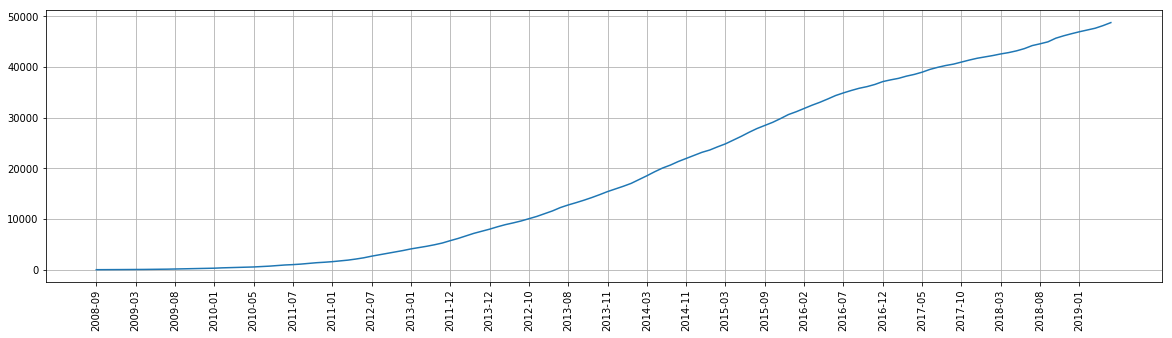

In [10]:
historic_host_since_count_df = historic_num_listing_df.groupby('yyyy-mm').count()
new_list = list(historic_host_since_count_df['id'])

from functools import reduce
accumulate_list = [reduce((lambda x,y : x + y), new_list[:i]) for i in range(1, len(new_list))]
host_since_list = historic_num_listing_df['yyyy-mm'].unique()

plt.figure(figsize = (20,5))
plt.grid(True)
plt.plot(np.arange(len(accumulate_list)), accumulate_list)
plt.xticks(np.arange(0,len(accumulate_list),5), host_since_list[::5], rotation = 90)
plt.show()

### 2. Historic Price

In [11]:
historic_folder_path = "../Resources/Airbnb/New_York_Historic_Data/*.csv"
historic_file_paths = glob.glob(historic_folder_path)

dates = []
historic_cols = ["room_type", 'borough', 'accommodates','price','latitude','longitude', 'last_modified']

historic_df = pd.DataFrame(columns=['date', 
                                    'price', 
                                    'entire_apt_count', 
                                    'private_room_count', 
                                    'share_room_count', 
                                    'Total count'])
i = 0
for path in sorted(historic_file_paths):#sorted(historic_file_paths):
    # date in yyyy-mm-dd
    date = path.split("/")[-1].split("_")[-1].split(".")[0].replace("-","_")
    dates.append(date)
    
    # DataFrame 
    df = pd.read_csv(path)
    df_rdc = df[historic_cols]
    df_rdc['last_modified'] = date
    historic_df.loc[i] = [date,
                          round(df_rdc['price'].mean(),2), 
                          df_rdc.groupby("room_type").count().iloc[0,2], 
                          df_rdc.groupby("room_type").count().iloc[1,2], 
                          df_rdc.groupby("room_type").count().iloc[2,2], 
                          df_rdc.count()['price']]
    i += 1

C:\Users\mcala\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


EmptyDataError: No columns to parse from file

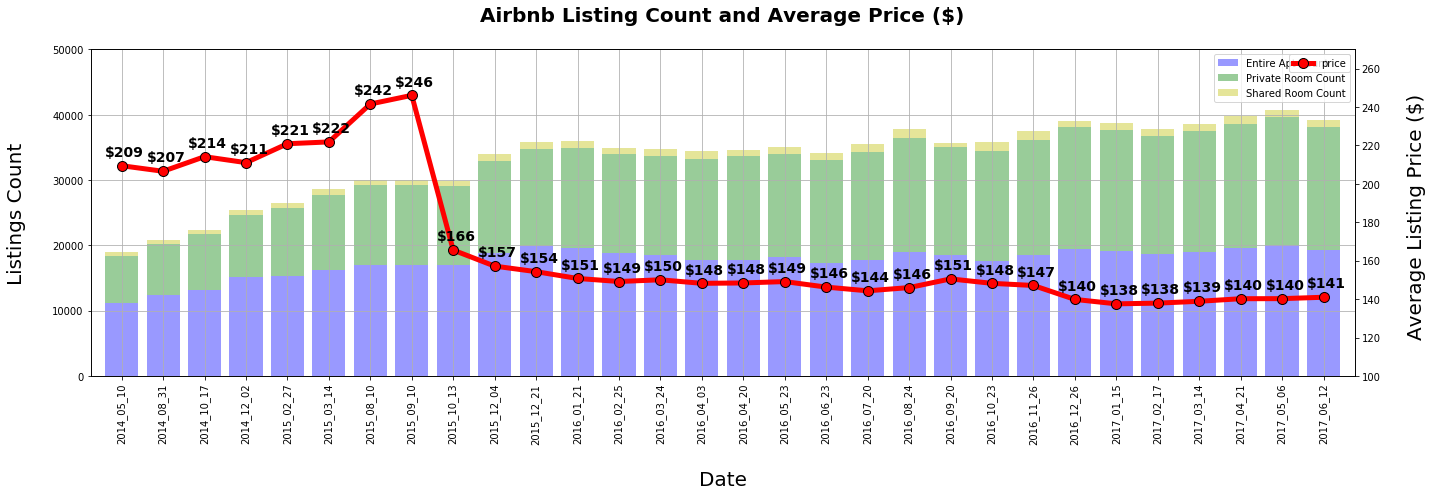

In [12]:
x = np.arange(historic_df.count()[1])
fig, ax1 = plt.subplots(figsize = (20,7))
plt.grid(True)
plt.xlim(-0.75, len(x) - 0.25)
ax1.set_xlabel("\nDate", fontsize = 20)
ax1.set_xticks(np.arange(historic_df.count()[1]))
ax1.set_xticklabels(historic_df['date'], rotation = 90)
ax1.set_ylabel("Listings Count\n", fontsize = 20)

ax1.bar(x, historic_df['entire_apt_count'], color = 'blue', label = 'Entire Apt Count', alpha = 0.4)
ax1.bar(x, historic_df['private_room_count'],
        bottom=historic_df['entire_apt_count'], color = 'green', label = 'Private Room Count', alpha = 0.4)
ax1.bar(x, historic_df['share_room_count'],
        bottom=historic_df['private_room_count'] + historic_df['entire_apt_count'],
        color = 'y', label = 'Shared Room Count', alpha = 0.4)
ax1.set_ylim(0, 50000)

ax1.legend()

ax2 = ax1.twinx()
ax2.plot(x, historic_df['price'], 'ro-', markersize = 10, mec = 'k', linewidth = 5, label = 'price')
for i in range(len(x)):
    ax2.text(x[i] - 0.4, historic_df['price'][i] + 5, "${:.0f}".format(historic_df['price'][i]) , 
             fontsize = 14,weight='bold')
ax2.set_ylabel("\nAverage Listing Price ($) ", fontsize = 20)
ax2.set_ylim(100, 270)

plt.title("Airbnb Listing Count and Average Price ($)\n", fontsize = 20, weight = "bold")
plt.legend()
plt.tight_layout()
plt.show()

# Average Price Computations

### Dataframe to collect all data related to pricing and clean-up

In [13]:
#Identify columns in the data that are relevant to computation of average price
price_cols = ['id', 'name', "city", "state", "zipcode", 'latitude', 'longitude', 'property_type',
        'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'minimum_nights', 'maximum_nights',
        'price', 'cleaning_fee', 'beds','bed_type', 'weekly_price', 'monthly_price', 
        'guests_included','extra_people', 'number_of_reviews','review_scores_rating',
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_value', 'review_scores_location', 
        'instant_bookable','is_business_travel_ready']
#Reduced dataframe with above columns 
listing_prc_red_df = listing_df[price_cols]
#Preview 
listing_prc_red_df.head()

,id,name,city,state,zipcode,latitude,longitude,property_type,room_type,accommodates,...,guests_included,extra_people,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_value,review_scores_location,instant_bookable,is_business_travel_ready
0,2539,Clean & quiet apt home by the park,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,Private room,2,...,1,$35.00,9,98.0,10.0,10.0,10.0,10.0,f,f
1,2595,Skylit Midtown Castle,New York,NY,10018,40.75362,-73.98377,Apartment,Entire home/apt,2,...,2,$0.00,44,95.0,9.0,9.0,9.0,10.0,f,f
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,New York,NY,10027,40.80902,-73.94190,Apartment,Private room,2,...,2,$20.00,0,NaN,NaN,NaN,NaN,NaN,f,f
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,NY,11238,40.68514,-73.95976,Guest suite,Entire home/apt,3,...,1,$0.00,258,90.0,10.0,9.0,9.0,10.0,f,f
4,4989,Great 1 bdrm. apartment in the PERFECT location!,New York,NY,10036,40.76260,-73.99304,Apartment,Entire home/apt,2,...,1,$0.00,27,89.0,9.0,9.0,9.0,10.0,f,f


In [14]:
# List of columns where nulls need to be dropped 
dropna_prc_cols = ['id', 'name', "zipcode", 'latitude', 'longitude',
        'property_type', 'room_type', 'accommodates', 'minimum_nights', 'maximum_nights',
        'price', 'cleaning_fee','number_of_reviews','review_scores_rating',
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_value', 
        'instant_bookable','is_business_travel_ready']
# Drop rows 
listing_rdc_prc_dna_df = listing_prc_red_df.dropna(subset = dropna_prc_cols)

In [15]:
# List of columns where values are to be filled with zeros 
listing_rdc_prc_dna_df["cleaning_fee"] = listing_rdc_prc_dna_df["cleaning_fee"].fillna(0).copy()
listing_rdc_prc_dna_df["weekly_price"] = listing_rdc_prc_dna_df["weekly_price"].fillna(0).copy()
listing_rdc_prc_dna_df["monthly_price"] = listing_rdc_prc_dna_df["monthly_price"].fillna(0).copy()
listing_rdc_prc_dna_df["guests_included"] = listing_rdc_prc_dna_df["guests_included"].fillna(0).copy()
listing_rdc_prc_dna_df["extra_people"] = listing_rdc_prc_dna_df["extra_people"].fillna(0).copy()

C:\Users\mcala\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mcala\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mcala\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [16]:
#Rename columns to have something more readble 
renamed_prc_listing = listing_rdc_prc_dna_df.rename(index=str, columns = {"id":"ID", "name":"AirBnb Name", 
                    "city": "City", "state": "State", "zipcode":"Zipcode", "latitude":"Latitude", "longitude":"Longitude",
                    "property_type":"Property Type", "room_type":"Room Type", "accommodates":"Accommodates",
                    "bathrooms":"Bathrooms", "bedrooms":"Bedrooms", "minimum_nights":"Min Nights", "maximum_nights":"Max Nights",                                       
                    "price":"Price", "cleaning_fee": "Cleaning Fee", "beds": "No. Beds","bed_type": "Bed Type", 
                    "weekly_price" : "Weekly Price", "monthly_price" : "Monthly Price",  "guests_included" : "Guests Included",
                    "extra_people" : "Extra People", "number_of_reviews":"# of Reviews", "review_scores_rating":"Review Score",                                         
                    "review_scores_accuracy": "Accuracy", "review_scores_cleanliness": "Cleanliness", "review_scores_value":"Value Review",
                    "review_scores_location": "Location Review","instant_bookable":"Instant Bookable","is_business_travel_ready":"Business Travel Ready"})
                                                
renamed_prc_listing.count()

ID                       31211
AirBnb Name              31211
City                     31173
State                    31210
Zipcode                  31211
Latitude                 31211
Longitude                31211
Property Type            31211
Room Type                31211
Accommodates             31211
Bathrooms                31184
Bedrooms                 31194
Min Nights               31211
Max Nights               31211
Price                    31211
Cleaning Fee             31211
No. Beds                 31202
Bed Type                 31211
Weekly Price             31211
Monthly Price            31211
Guests Included          31211
Extra People             31211
# of Reviews             31211
Review Score             31211
Accuracy                 31211
Cleanliness              31211
Value Review             31211
Location Review          31208
Instant Bookable         31211
Business Travel Ready    31211
dtype: int64

In [17]:
#Removing $ and , from Price and Cleaning Fee to convert them to float
renamed_prc_listing["Price"] = renamed_prc_listing["Price"].str.replace('$', '')
renamed_prc_listing["Price"] = renamed_prc_listing["Price"].str.replace(',', '')

renamed_prc_listing["Cleaning Fee"] = renamed_prc_listing["Cleaning Fee"].str.replace('$', '')
renamed_prc_listing["Cleaning Fee"] = renamed_prc_listing["Cleaning Fee"].str.replace(',', '')

renamed_prc_listing["Weekly Price"] = renamed_prc_listing["Price"].str.replace('$', '')
renamed_prc_listing["Weekly Price"] = renamed_prc_listing["Price"].str.replace(',', '')

renamed_prc_listing["Monthly Price"] = renamed_prc_listing["Cleaning Fee"].str.replace('$', '')
renamed_prc_listing["Monthly Price"] = renamed_prc_listing["Cleaning Fee"].str.replace(',', '')

renamed_prc_listing["Extra People"] = renamed_prc_listing["Extra People"].str.replace('$', '')
renamed_prc_listing["Extra People"] = renamed_prc_listing["Extra People"].str.replace(',', '')

renamed_prc_listing[["Price", "Cleaning Fee", "Weekly Price", "Monthly Price", "Extra People"]] = renamed_prc_listing[["Price", "Cleaning Fee", "Weekly Price", "Monthly Price", "Extra People"]].apply(pd.to_numeric)
renamed_prc_listing.head()

,ID,AirBnb Name,City,State,Zipcode,Latitude,Longitude,Property Type,Room Type,Accommodates,...,Guests Included,Extra People,# of Reviews,Review Score,Accuracy,Cleanliness,Value Review,Location Review,Instant Bookable,Business Travel Ready
0,2539,Clean & quiet apt home by the park,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,Private room,2,...,1,35.0,9,98.0,10.0,10.0,10.0,10.0,f,f
1,2595,Skylit Midtown Castle,New York,NY,10018,40.75362,-73.98377,Apartment,Entire home/apt,2,...,2,0.0,44,95.0,9.0,9.0,9.0,10.0,f,f
4,4989,Great 1 bdrm. apartment in the PERFECT location!,New York,NY,10036,40.76260,-73.99304,Apartment,Entire home/apt,2,...,1,0.0,27,89.0,9.0,9.0,9.0,10.0,f,f
5,5022,Entire Apt: Spacious Studio/Loft by central park,New York,NY,10029,40.79851,-73.94399,Apartment,Entire home/apt,1,...,1,20.0,9,93.0,10.0,9.0,10.0,9.0,f,f
6,5099,Large Cozy 1 BR Apartment In Midtown East,New York,NY,10016,40.74767,-73.97500,Apartment,Entire home/apt,2,...,2,100.0,71,88.0,10.0,9.0,9.0,9.0,t,f


In [18]:
#Cleansing Data Further

#Minimum Rating Score of 80
clean_airbnb_prc = renamed_prc_listing[renamed_prc_listing["Review Score"] >= 80].copy()

#Cleanliness & Location Accuracy Should be at least 8
clean_airbnb_prc = clean_airbnb_prc[(clean_airbnb_prc["Cleanliness"] >= 8) & (clean_airbnb_prc["Location Review"] >=8)].copy()

#Total Price combining Cleaning Fee w/ Price
clean_airbnb_prc["Total Price"] = clean_airbnb_prc["Price"] + clean_airbnb_prc["Cleaning Fee"]

#Output to csv
clean_airbnb_prc.to_csv("../Resources/Airbnb/Current_Listing/clean_airbnb_prc.csv")


# Start here once clean data is ready

In [19]:
#Bin the Accomodates as [1-2, 3-4, 5-9, 10+] for each Room Type 
acco_bins = [0, 2, 4, 9, 25]
# Create the names for the  bins
group_names = ["1-2", "3-4", "5-9", "10+"]
clean_airbnb_prc['Acco Bins'] = pd.cut(clean_airbnb_prc['Accommodates'], acco_bins, labels = group_names )
clean_airbnb_prc['Avg Per Person'] = clean_airbnb_prc['Total Price']/clean_airbnb_prc['Accommodates']
clean_airbnb_prc.head()

,ID,AirBnb Name,City,State,Zipcode,Latitude,Longitude,Property Type,Room Type,Accommodates,...,Review Score,Accuracy,Cleanliness,Value Review,Location Review,Instant Bookable,Business Travel Ready,Total Price,Acco Bins,Avg Per Person
0,2539,Clean & quiet apt home by the park,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,Private room,2,...,98.0,10.0,10.0,10.0,10.0,f,f,174.0,1-2,87.0
1,2595,Skylit Midtown Castle,New York,NY,10018,40.75362,-73.98377,Apartment,Entire home/apt,2,...,95.0,9.0,9.0,9.0,10.0,f,f,325.0,1-2,162.5
4,4989,Great 1 bdrm. apartment in the PERFECT location!,New York,NY,10036,40.76260,-73.99304,Apartment,Entire home/apt,2,...,89.0,9.0,9.0,9.0,10.0,f,f,130.0,1-2,65.0
5,5022,Entire Apt: Spacious Studio/Loft by central park,New York,NY,10029,40.79851,-73.94399,Apartment,Entire home/apt,1,...,93.0,10.0,9.0,10.0,9.0,f,f,160.0,1-2,160.0
6,5099,Large Cozy 1 BR Apartment In Midtown East,New York,NY,10016,40.74767,-73.97500,Apartment,Entire home/apt,2,...,88.0,10.0,9.0,9.0,9.0,t,f,325.0,1-2,162.5


In [20]:
#Compute Average by bins 
acco_avg_df = clean_airbnb_prc.groupby(by=['Room Type', 'Acco Bins'], as_index=False).aggregate({'Avg Per Person':'mean'})
acco_avg_df

,Room Type,Acco Bins,Avg Per Person
0,Entire home/apt,1-2,117.483951
1,Entire home/apt,3-4,72.188188
2,Entire home/apt,5-9,60.464675
3,Entire home/apt,10+,56.110056
4,Private room,1-2,71.018422
5,Private room,3-4,40.155497
6,Private room,5-9,41.861393
7,Private room,10+,32.616922
8,Shared room,1-2,65.291434
9,Shared room,3-4,34.443627


In [21]:
acco_avg_df_pivot = acco_avg_df.pivot(index='Room Type', values='Avg Per Person', columns = 'Acco Bins')
acco_avg_df_pivot.head()

Acco Bins,1-2,3-4,5-9,10+
Room Type,,,,
Entire home/apt,117.483951,72.188188,60.464675,56.110056
Private room,71.018422,40.155497,41.861393,32.616922
Shared room,65.291434,34.443627,33.467687,22.312500


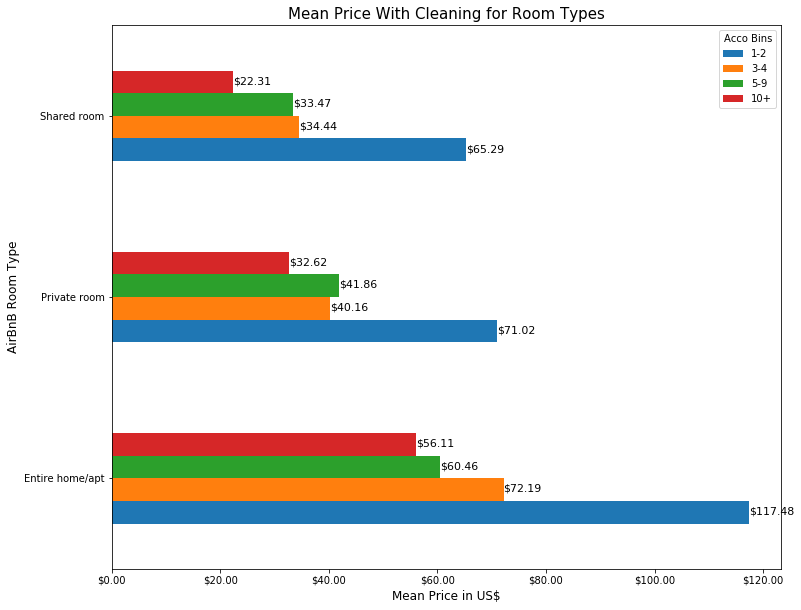

In [22]:
#Generate Plots
import matplotlib.ticker as mtick
fmt = '$%.2f'
# Set figure width to 8 and height to 6
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

ax = acco_avg_df_pivot.plot.barh(stacked = False);
tick = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# find the values and append to list

# create a list to collect the plt.patches data
totals = []

for i in ax.patches:
    totals.append(i.get_width())


for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y() + 0.05, "${0:.2f}".format(round(i.get_width(),2)),  fontsize=11,color='black')

plt.title('Mean Price With Cleaning for Room Types', fontsize=15)
plt.xlabel('Mean Price in US$', fontsize= 12)
plt.ylabel('AirBnB Room Type', fontsize= 12)

plt.savefig("../Resources/Airbnb/Current_Listing/MeanPriceByRoomTypes.png")

In [23]:
clean_airbnb_prc.to_csv("../Resources/Airbnb/Current_Listing/clean_airbnb_prc_binned.csv")

In [25]:
#Bin the Price per Person s [0-250, 500, 750, 1000, 1500, 2000+] for each Room Type 
totprc_bins = [0, 250, 500, 750, 1000, 1500, 12000]
# Create the names for the  bins
tot_bkts = ["0 to 250", "251 to 500", "501 to 750", "751 to 1000", "1001 to 1500", "1501+"]
clean_airbnb_prc['Total Price Bins'] = pd.cut(clean_airbnb_prc['Total Price'], totprc_bins, labels = tot_bkts )
clean_airbnb_prc.head()

,ID,AirBnb Name,City,State,Zipcode,Latitude,Longitude,Property Type,Room Type,Accommodates,...,Accuracy,Cleanliness,Value Review,Location Review,Instant Bookable,Business Travel Ready,Total Price,Acco Bins,Avg Per Person,Total Price Bins
0,2539,Clean & quiet apt home by the park,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,Private room,2,...,10.0,10.0,10.0,10.0,f,f,174.0,1-2,87.0,0 to 250
1,2595,Skylit Midtown Castle,New York,NY,10018,40.75362,-73.98377,Apartment,Entire home/apt,2,...,9.0,9.0,9.0,10.0,f,f,325.0,1-2,162.5,251 to 500
4,4989,Great 1 bdrm. apartment in the PERFECT location!,New York,NY,10036,40.76260,-73.99304,Apartment,Entire home/apt,2,...,9.0,9.0,9.0,10.0,f,f,130.0,1-2,65.0,0 to 250
5,5022,Entire Apt: Spacious Studio/Loft by central park,New York,NY,10029,40.79851,-73.94399,Apartment,Entire home/apt,1,...,10.0,9.0,10.0,9.0,f,f,160.0,1-2,160.0,0 to 250
6,5099,Large Cozy 1 BR Apartment In Midtown East,New York,NY,10016,40.74767,-73.97500,Apartment,Entire home/apt,2,...,10.0,9.0,9.0,9.0,t,f,325.0,1-2,162.5,251 to 500


In [26]:
#Compute counts of price by bins 
price_avg_df = clean_airbnb_prc.groupby(by=['Total Price Bins'], as_index=False).aggregate({'Total Price':'count'})
price_avg_df['Total Price Pct'] = 100*(price_avg_df['Total Price']/(price_avg_df['Total Price'].sum()))
price_avg_df

,Total Price Bins,Total Price,Total Price Pct
0,0 to 250,21597,73.594357
1,251 to 500,6568,22.381244
2,501 to 750,808,2.753357
3,751 to 1000,214,0.729231
4,1001 to 1500,109,0.371431
5,1501+,50,0.170381


In [27]:
# Remove buckets above $750: 
clean_airbnb_prc_box = clean_airbnb_prc.loc[(clean_airbnb_prc['Total Price'] > 55) & (clean_airbnb_prc['Total Price'] < 751)]

clean_airbnb_prc_box['Total Price'].count()

27859

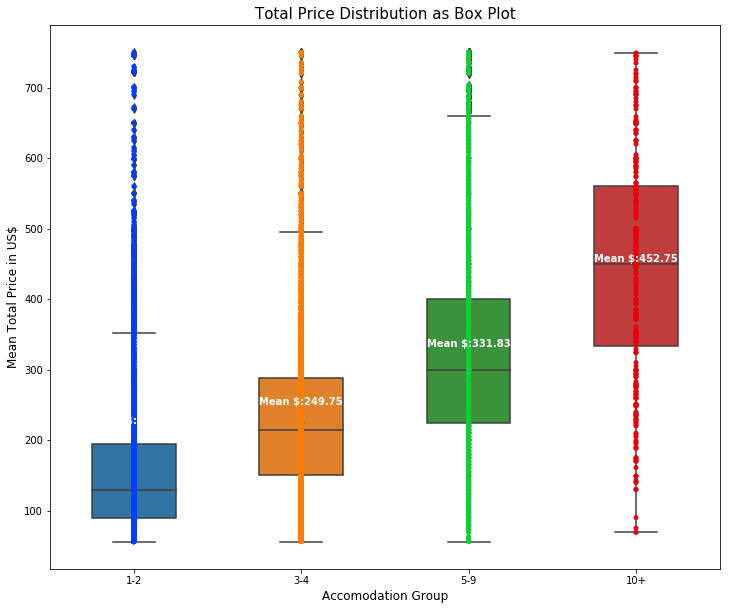

In [28]:
# import seaborn
import seaborn as sns

# hue = 'Room Type'
ax =sns.boxplot(y='Total Price', x='Acco Bins', data= clean_airbnb_prc_box, width=0.5, 
                  showmeans=True)
                  
ax =sns.stripplot(y='Total Price', x='Acco Bins',data= clean_airbnb_prc_box, jitter=False, palette = 'bright',
                  color = 'blue')                  

plt.title('Total Price Distribution as Box Plot', fontsize=15)
plt.xlabel('Accomodation Group', fontsize= 12)
plt.ylabel('Mean Total Price in US$', fontsize= 12)


# Calculate number of obs per group & median to position labels
means = clean_airbnb_prc_box.groupby(['Room Type', 'Acco Bins'])['Total Price'].mean().values.round(2)
nobs = [str(x) for x in means.tolist()]
nobs = ["Mean $:" + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], means[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='medium', color='w', weight='bold')

plt.savefig("../Resources/Airbnb/Current_Listing/PriceDistributionBoxPlot.png")

In [29]:
#Bin the Price per Person s [0-250, 500, 750, 1000, 1500, 2000+] for each Room Type 
avgprc_bins = [0, 25, 50, 75, 100, 250, 500, 750, 1000, 1500, 12000]
# Create the names for the  bins
avg_bkts = ["0 to 25", "26 to 50", "51 to 75", "76-100", "101 to 250", "251 to 500", 
            "501 to 750", "751 to 1000", "1001 to 1500", "1501+"]
clean_airbnb_prc['Person Avg Bins'] = pd.cut(clean_airbnb_prc['Avg Per Person'], avgprc_bins, labels = avg_bkts )
clean_airbnb_prc.head()

,ID,AirBnb Name,City,State,Zipcode,Latitude,Longitude,Property Type,Room Type,Accommodates,...,Cleanliness,Value Review,Location Review,Instant Bookable,Business Travel Ready,Total Price,Acco Bins,Avg Per Person,Total Price Bins,Person Avg Bins
0,2539,Clean & quiet apt home by the park,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,Private room,2,...,10.0,10.0,10.0,f,f,174.0,1-2,87.0,0 to 250,76-100
1,2595,Skylit Midtown Castle,New York,NY,10018,40.75362,-73.98377,Apartment,Entire home/apt,2,...,9.0,9.0,10.0,f,f,325.0,1-2,162.5,251 to 500,101 to 250
4,4989,Great 1 bdrm. apartment in the PERFECT location!,New York,NY,10036,40.76260,-73.99304,Apartment,Entire home/apt,2,...,9.0,9.0,10.0,f,f,130.0,1-2,65.0,0 to 250,51 to 75
5,5022,Entire Apt: Spacious Studio/Loft by central park,New York,NY,10029,40.79851,-73.94399,Apartment,Entire home/apt,1,...,9.0,10.0,9.0,f,f,160.0,1-2,160.0,0 to 250,101 to 250
6,5099,Large Cozy 1 BR Apartment In Midtown East,New York,NY,10016,40.74767,-73.97500,Apartment,Entire home/apt,2,...,9.0,9.0,9.0,t,f,325.0,1-2,162.5,251 to 500,101 to 250


In [34]:
#Compute counts of price by bins 
price_avg_df1 = clean_airbnb_prc.groupby(by=['Person Avg Bins']).aggregate({'Person Avg Bins':'count'})
#price_avg_df1['Person Avg Pct'] = 100*(price_avg_df1['Avg Per Person']/(price_avg_df1['Avg Per Person'].sum()))
price_avg_df1

,Person Avg Bins
Person Avg Bins,
0 to 25,1162
26 to 50,8846
51 to 75,8380
76-100,5062
101 to 250,5687
251 to 500,184
501 to 750,10
751 to 1000,3
1001 to 1500,4


In [35]:
# Remove buckets above $750: 
clean_airbnb_prc_box1 = clean_airbnb_prc.loc[(clean_airbnb_prc['Avg Per Person'] > 5) & (clean_airbnb_prc['Avg Per Person'] < 251)]

clean_airbnb_prc_box1['Avg Per Person'].count()

29135

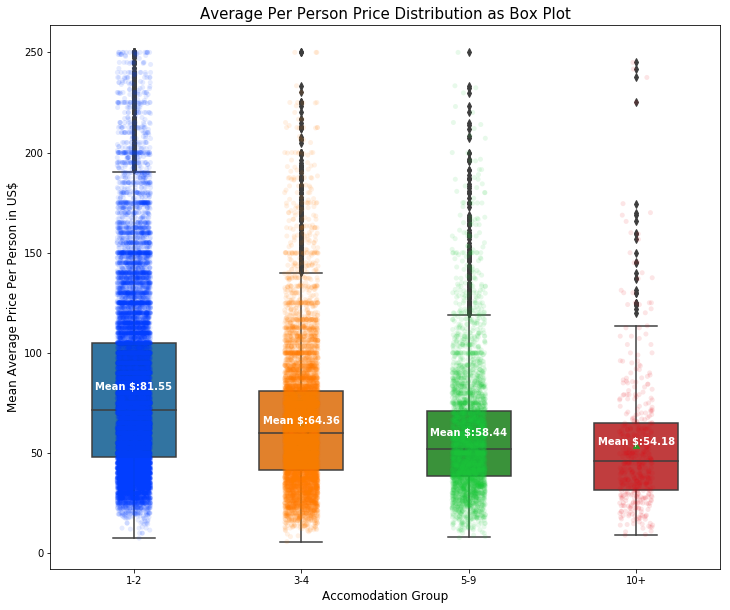

In [43]:
# import seaborn
import seaborn as sns

# hue = 'Room Type'

                  
ax =sns.stripplot(y='Avg Per Person', x='Acco Bins',data= clean_airbnb_prc_box1, jitter=True, palette = 'bright',
                  color = 'blue', alpha = 0.1)                  

ax =sns.boxplot(y='Avg Per Person', x='Acco Bins', data= clean_airbnb_prc_box1, width=0.5, 
                  showmeans=True)

plt.title('Average Per Person Price Distribution as Box Plot', fontsize=15)
plt.xlabel('Accomodation Group', fontsize= 12)
plt.ylabel('Mean Average Price Per Person in US$', fontsize= 12)


# Calculate number of obs per group & median to position labels
means = clean_airbnb_prc_box1.groupby(['Acco Bins'])['Avg Per Person'].mean().values.round(2)
nobs = [str(x) for x in means.tolist()]
nobs = ["Mean $:" + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], means[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='medium', color='w', weight='bold')

plt.savefig("../Resources/Airbnb/Current_Listing/PriceDistributionBoxPlot1.png")
